In [4]:
from scipy.special import kl_div,rel_entr
import numpy as np
from matplotlib import pyplot as plt
import quantum_classical_2Dgamma as qc

import tensorflow as tf
from matplotlib import pyplot
from qibo import gates, hamiltonians, models, set_backend, set_threads
from matplotlib import cm
from matplotlib import pyplot as plt, colors
from matplotlib.offsetbox import AnchoredText
import pandas as pd

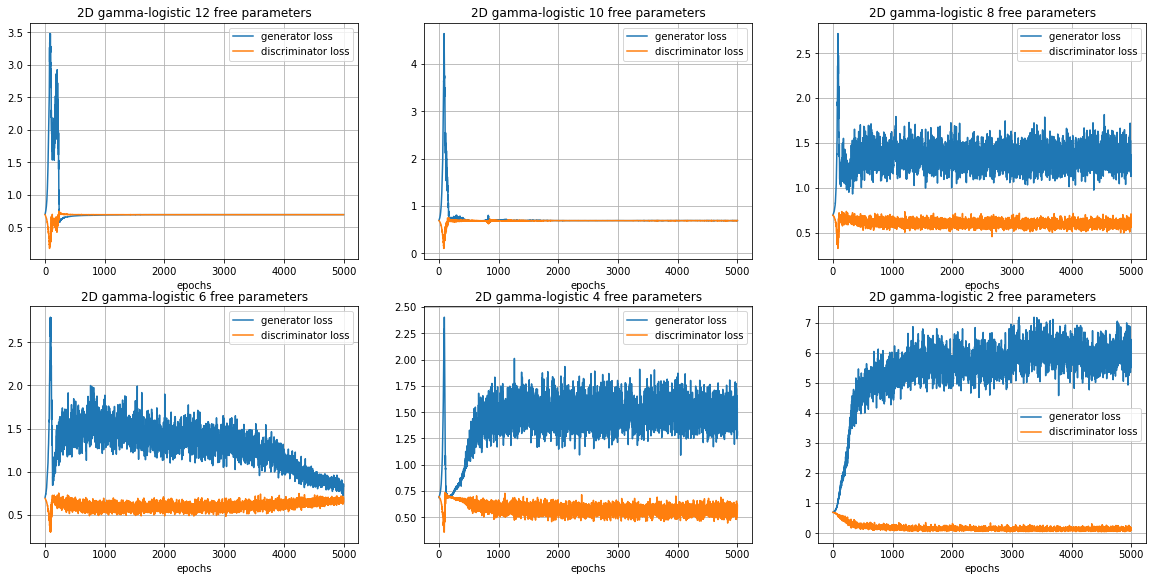

In [5]:
n_layers=128
fixed_params=range(0,12,2)
pyplot.figure(figsize=(20,20))
rows=4
cols=3


for i, val in enumerate(fixed_params):
    pyplot.subplot(rows,cols,i+1)
    d_loss = np.loadtxt(f"data/dloss_2Dgaussian_gamma_different_circuit_2_3_1_10000_{n_layers}_0.1_{val}", delimiter=' ')
    g_loss= np.loadtxt(f"data/gloss_2Dgaussian_gamma_different_circuit_2_3_1_10000_{n_layers}_0.1_{val}", delimiter=' ')
    #d_loss=d_loss[:10000]
    #g_loss=g_loss[:10000]
    #pyplot.figure(figsize=(20, 7), dpi=80)
    pyplot.plot(np.linspace(0, len(g_loss), len(g_loss)), g_loss, label='generator loss')
    pyplot.plot(np.linspace(0, len(g_loss), len(g_loss)), d_loss, label='discriminator loss')
    pyplot.title(f'2D gamma-logistic {12-val} free parameters')
    pyplot.xlabel('epochs')
    pyplot.legend()
    pyplot.grid()

pyplot.show()

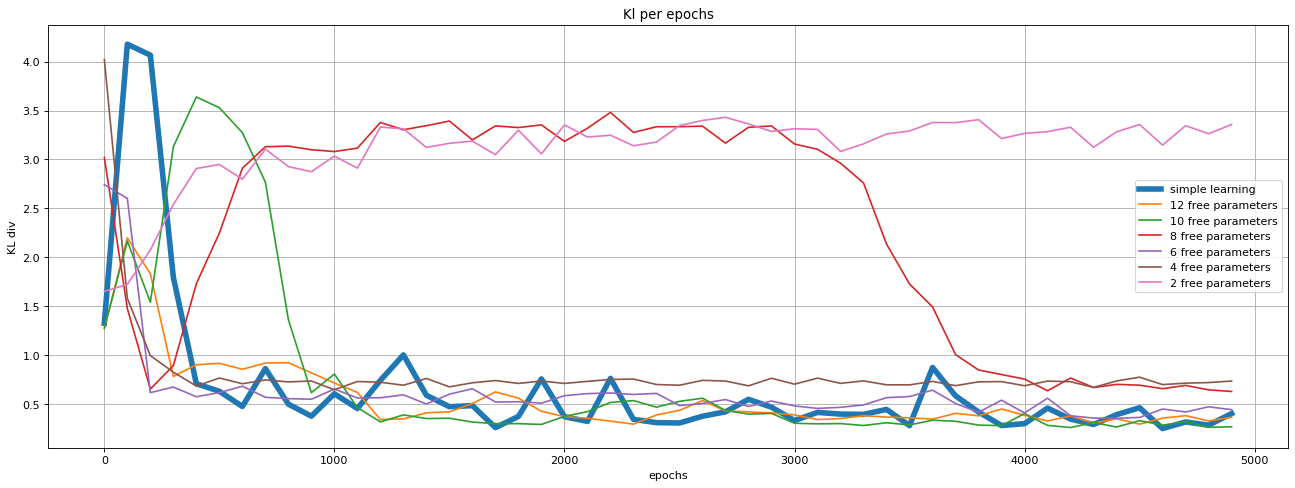

In [7]:
epochs=range(0,5000,100)
pyplot.figure(figsize=(20, 7), dpi=80)

kl=np.loadtxt(f"data/KLdiv_2Dgaussian_2_3_1_10000_{n_layers}_0.1")
pyplot.plot(epochs[:len(kl)],kl,label=f"simple learning",linewidth=5)

for i, val in enumerate(fixed_params):
   
    kl=np.loadtxt(f"data/KLdiv_2Dgaussian_gamma_2_3_1_10000_{n_layers}_0.1_{val}")
   
    pyplot.plot(epochs,kl,label=f"{12-val} free parameters")
    
pyplot.title(f'Kl per epochs')
pyplot.xlabel('epochs')
pyplot.ylabel('KL div')
pyplot.legend()
pyplot.grid()

pyplot.show()

This plot shows that the KL divergence of the transfer learning converges not earlier than the simple learning. 